<a href="https://colab.research.google.com/github/aayushmanda/da6401_assignment2/blob/main/da6401_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

In [4]:
!wget https://storage.googleapis.com/wandb_datasets/nature_12K.zip

--2025-04-01 16:22:00--  https://storage.googleapis.com/wandb_datasets/nature_12K.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.207, 74.125.195.207, 172.253.117.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3816687935 (3.6G) [application/zip]
Saving to: ‘nature_12K.zip’

nature_12K.zip      100%[===================>]   3.55G   261MB/s    in 20s     

2025-04-01 16:22:19 (186 MB/s) - ‘nature_12K.zip’ saved [3816687935/3816687935]

time: 19.8 s (started: 2025-04-01 16:22:00 +00:00)


In [5]:
!unzip nature_12K.zip

Streaming output truncated to the last 5000 lines.
  inflating: inaturalist_12K/train/Arachnida/117ef7f1812725f359500448a258e713.jpg  
  inflating: inaturalist_12K/train/Arachnida/6409254954c3b46d88d64f0bf4c632fa.jpg  
  inflating: inaturalist_12K/train/Arachnida/aaed865750bd52944658a7dd23366948.jpg  
  inflating: inaturalist_12K/train/Arachnida/460cc09ef510d400a4d47a836ddd45e6.jpg  
  inflating: inaturalist_12K/train/Arachnida/55c48c3afef0b745e53951284cdb2db4.jpg  
  inflating: inaturalist_12K/train/Arachnida/bff3daa961ee96a37ebe12dc0bcce504.jpg  
  inflating: inaturalist_12K/train/Arachnida/9082d4f2107bccf1f14d71c8944be607.jpg  
  inflating: inaturalist_12K/train/Arachnida/93d0130423d42f7c6228150eb95a2a93.jpg  
  inflating: inaturalist_12K/train/Arachnida/051aba6d7bc324bad76bd438ed3cc276.jpg  
  inflating: inaturalist_12K/train/Arachnida/67595af09c015c7753d5d4935677590f.jpg  
  inflating: inaturalist_12K/train/Arachnida/90621e8ab30c664038fbfcdc4a17b914.jpg  
  inflating: inaturalist_

In [6]:
train_dir='inaturalist_12K/train/'
test_dir='inaturalist_12K/val/'
categories=['Amphibia','Animalia','Arachnida','Aves','Fungi','Insecta','Mammalia','Mollusca','Plantae','Reptilia']



time: 481 µs (started: 2025-04-01 16:23:07 +00:00)


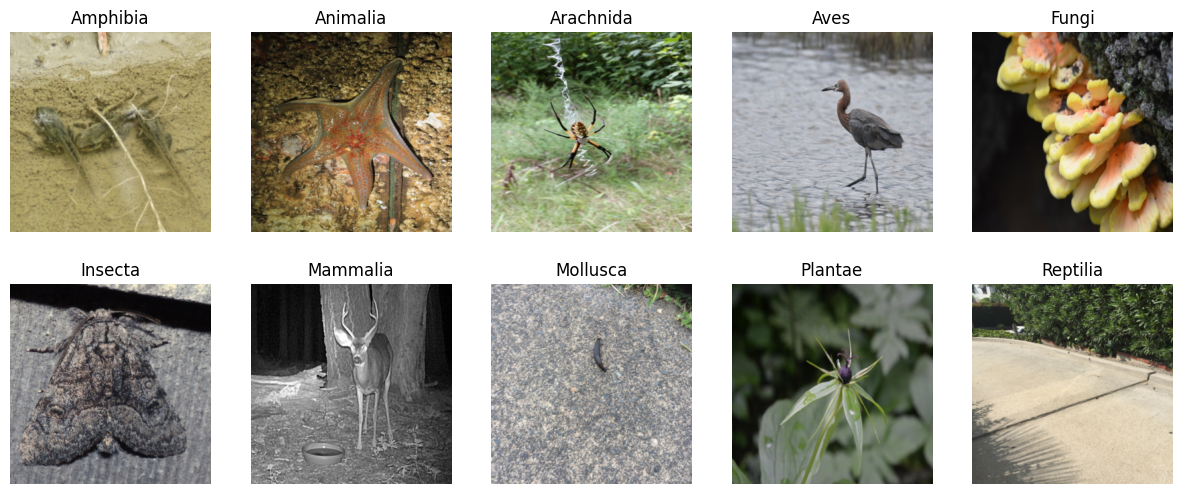

time: 929 ms (started: 2025-04-01 16:23:42 +00:00)


In [8]:
import torch
import torchvision
from torchvision.io import read_image
from torchvision.transforms import Resize, ToPILImage
import matplotlib.pyplot as plt
import os

# Initialize figure
fig = plt.figure(figsize=(15, 6))
rows, columns = 2, 5
i = 1

# Loop through categories
for category in categories:
    dir_path = os.path.join(train_dir, category)

    for img_name in os.listdir(dir_path):
        img_path = os.path.join(dir_path, img_name)

        # Read image using PyTorch
        img_tensor = read_image(img_path)
        # Resize image using torchvision transforms
        resize_transform = Resize((300, 300))
        resized_img_tensor = resize_transform(img_tensor)

        # Convert tensor to PIL image for visualization
        pil_img = ToPILImage()(resized_img_tensor)

        # Add subplot and display image
        fig.add_subplot(rows, columns, i)
        plt.imshow(pil_img)
        plt.axis('off')
        plt.title(category)

        i += 1
        break  # Show only one image per category

plt.show()


In [9]:
# !ls 'inaturalist_12K/train/Amphibia'

time: 177 µs (started: 2025-04-01 16:23:45 +00:00)


In [10]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


# Define directories
train_dir = 'inaturalist_12K/train/'
test_dir = 'inaturalist_12K/val/'

# Define transformations with additional augmentations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Create datasets
image_datasets = {
    'train': datasets.ImageFolder(train_dir, data_transforms['train']),
    'val': datasets.ImageFolder(test_dir, data_transforms['val'])
}

# Create dataloaders with pin_memory and dynamic batch size
dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=64, shuffle=True, num_workers=4, pin_memory=True),
    'val': DataLoader(image_datasets['val'], batch_size=64, shuffle=False, num_workers=4)
}

# Get dataset sizes and class names
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

# Set device for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Print summary information
print(f"Training dataset size: {dataset_sizes['train']}")
print(f"Validation dataset size: {dataset_sizes['val']}")
print(f"Class names: {class_names}")
print(f"Using device: {device}")


Training dataset size: 9999
Validation dataset size: 2000
Class names: ['Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia']
Using device: cuda:0
time: 89.4 ms (started: 2025-04-01 16:23:46 +00:00)


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [29]:
# from torch.utils.data import DataLoader, Subset
# subset_size = 1000  # Specify the desired size of the subset
# indices = range(subset_size)
# train_dataset = Subset(image_datasets['train'], indices) # Create the subset
# val_dataset = Subset(image_datasets['val'], indices)

# dataloaders = {
#     'train': DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True),
#     'val': DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
# }

# # Print summary information
# print(f"Training dataset size: {len(train_dataset)}")
# print(f"Validation dataset size: {len(val_dataset)}")
# print(f"Class names: {class_names}")
# print(f"Using device: {device}")


Training dataset size: 1000
Validation dataset size: 1000
Class names: ['Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia']
Using device: cpu
time: 1.13 ms (started: 2025-04-01 15:54:17 +00:00)


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FlexibleCNN(nn.Module):
    def __init__(self,
                 input_channels=3,
                 num_classes=10,
                 num_conv_layers=5,
                 conv_filters=32,
                 filter_size=3,
                 activation_func=nn.ReLU,
                 dense_neurons=512,
                 dropout_rate=0.25):

        super().__init__()

        self.conv_blocks = nn.ModuleList()
        in_channels = input_channels

        # Adding convolution-activation-batchnorm-maxpool blocks
        for _ in range(num_conv_layers):
            self.conv_blocks.append(nn.Sequential(
                nn.Conv2d(in_channels=in_channels, out_channels=conv_filters,
                          kernel_size=filter_size, stride=1, padding=filter_size//2),
                nn.BatchNorm2d(conv_filters),  # Adding Batch Normalization
                activation_func(),
                nn.MaxPool2d(kernel_size=2)
            ))
            in_channels = conv_filters

        # Flatten layer
        self.flatten = nn.Flatten()

        # Calculating input size for the first fully connected layer
        input_size = conv_filters * (224 // (2**num_conv_layers))**2  # Calculate input size dynamically

        # Fully connected layers with Dropout
        self.fc1 = nn.Linear(input_size, dense_neurons)  # Use calculated input size
        self.dropout = nn.Dropout(dropout_rate)  # Adding Dropout layer
        self.fc2 = nn.Linear(dense_neurons, num_classes)

    def forward(self, x):
        for block in self.conv_blocks:
            x = block(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply Dropout during training
        x = self.fc2(x)
        return x

# Example instantiation
model = FlexibleCNN(input_channels=3, num_classes=10, num_conv_layers=4,
                    conv_filters=48, filter_size=3, activation_func=nn.ReLU,
                    dense_neurons=512)

print(model)


FlexibleCNN(
  (conv_blocks): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1-3): 3 x Sequential(
      (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=9408, out_features=512, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)
time: 52.8 ms (started: 2025-04-01 16:23:58 +00:00)


In [12]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.31 s (started: 2025-04-01 16:23:59 +00:00)


In [13]:
import numpy as np

time: 347 µs (started: 2025-04-01 16:24:02 +00:00)


In [14]:
# torch.eye(10, 10, device=labels.device)[labels].shape

time: 267 µs (started: 2025-04-01 16:24:02 +00:00)


In [15]:
# torch.eye(10, 10, device=labels.device)[labels].shape, outputs.shape

time: 169 µs (started: 2025-04-01 16:24:02 +00:00)


In [16]:
# inputs.shape, labels.shape

time: 236 µs (started: 2025-04-01 16:24:03 +00:00)


In [17]:
# model(inputs).shape

time: 194 µs (started: 2025-04-01 16:24:03 +00:00)


In [18]:
# criterion(model(inputs), torch.eye(10, 10, device=labels.device)[labels])

time: 180 µs (started: 2025-04-01 16:24:04 +00:00)


In [19]:

# torch.max(outputs, 1)

time: 224 µs (started: 2025-04-01 16:24:05 +00:00)


In [20]:

# torch.max(model(inputs), 1)

time: 246 µs (started: 2025-04-01 16:24:05 +00:00)


### Estimated training time is 12 mins

In [ ]:

import torch.optim as optim
import time

# Hyperparameters
num_epochs = 5  # Number of epochs to train
learning_rate = 1e-3  # Learning rate

# Set up the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Adam optimizer
def initialize_weights(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)

model.apply(initialize_weights)

# Move model to the appropriate device
model = model.to(device)

lossi = []
# Training loop
for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print('-' * 10)

    for phase in ['train', 'val']:  # Correctly iterate over phases
        if phase == 'train':
            model.train()  # Set model to training mode
        else:
            model.eval()   # Set model to evaluate mode

        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, labels in dataloaders[phase]:  # Use correct dataloader based on phase
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)  # Get the predicted classes
                loss = criterion(outputs, labels)  # Calculate loss

                # Backward pass + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            lossi.append(loss.item())

            # Statistics
            running_loss += loss.item() * inputs.size(0)  # Accumulate loss
            running_corrects += torch.sum(preds == labels.data)  # Count correct predictions

        epoch_loss = running_loss / len(dataloaders[phase].dataset)
        epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

        print(f'{phase} Loss: {epoch_loss:.4f} | \t Acc: {epoch_acc:.4f}')

print('Training complete')


Epoch 1/5
----------
train Loss: 2.9084 | 	 Acc: 0.1590
val Loss: 2.2189 | 	 Acc: 0.2120
Epoch 2/5
----------


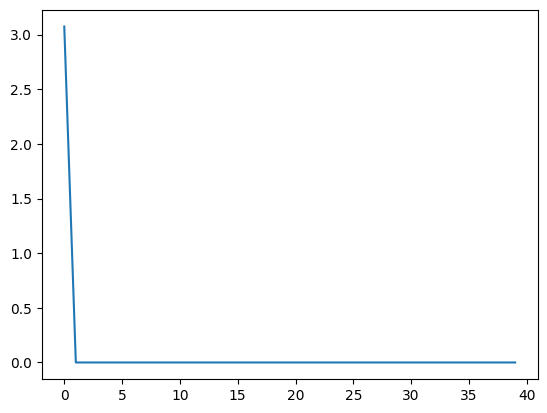

time: 125 ms (started: 2025-04-01 15:54:03 +00:00)


In [28]:
plt.plot(torch.tensor(lossi))

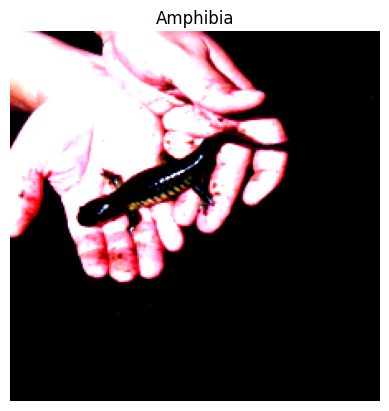

time: 222 ms (started: 2025-03-28 18:18:03 +00:00)


In [ ]:
import matplotlib.pyplot as plt

def visualize_transforms(dataset):
    img, label = dataset[50]  # Get one sample
    plt.imshow(img.permute(2, 1, 0))  # Change from CxHxW to HxWxC for visualization
    plt.title(class_names[label])
    plt.axis('off')
    plt.show()

visualize_transforms(image_datasets['train'])

In [ ]:
70/80

0.75

In [ ]:
0.875 * 20

17.5

# Problem 2

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.optim as optim

# Hyperparameters
num_epochs = 5  # Number of epochs to train
learning_rate = 1e-3  # Learning rate (0.001 as specified)

# Load pre-trained ResNet50
model = models.resnet50(pretrained=True)

# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Replace the final layer
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)

# Ensure the new layer is trainable
for param in model.fc.parameters():
    param.requires_grad = True

# Set up the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer = optim.Adam(model.fc.parameters(), lr=learning_rate)  # Optimize only the final layer

# Move model to the appropriate device (assuming device is defined, e.g., 'cuda' or 'cpu')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

lossi = []  # To store loss values

# Training loop
for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print('-' * 10)

    for phase in ['train', 'val']:  # Iterate over training and validation phases
        if phase == 'train':
            model.train()  # Set model to training mode
        else:
            model.eval()   # Set model to evaluation mode

        running_loss = 0.0
        running_corrects = 0

        # Iterate over data (assuming dataloaders is a dict with 'train' and 'val' keys)
        for inputs, labels in dataloaders[phase]:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)  # Get the predicted classes
                loss = criterion(outputs, labels)  # Calculate loss

                # Backward pass + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            lossi.append(loss.item())

            # Statistics
            running_loss += loss.item() * inputs.size(0)  # Accumulate loss
            running_corrects += torch.sum(preds == labels.data)  # Count correct predictions

        epoch_loss = running_loss / len(dataloaders[phase].dataset)
        epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

        print(f'{phase} Loss: {epoch_loss:.4f} | \t Acc: {epoch_acc:.4f}')

print('Training complete')